# 11 -- Fashion MNIST - NumPy

## Victor Jose Novaes Pires

### 2019-03-16

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from tqdm import __version__

print(f"tqdm version: {__version__}")

tqdm version: 4.31.1


In [4]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [5]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [6]:
from pandas import __version__

print(f"Pandas version: {__version__}")

Pandas version: 0.24.2


In [7]:
from seaborn import __version__

print(f"Seaborn version: {__version__}")

Seaborn version: 0.9.0


In [8]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.3


In [9]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0.1


## Fashion MNIST dataset

In [10]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
import numpy as np

classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
num_classes = len(classes)

num_classes

10

In [13]:
names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

names = {k: v for k, v in zip(classes, names)}

names

{0: 'T-shirt/Top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Flattening

In [14]:
X_train = np.asarray([X.flatten() for X in X_train])
X_test = np.asarray([X.flatten() for X in X_test])

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train.shape, y_test.shape

((60000, 1), (10000, 1))

### Feature scaling

In [16]:
X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [17]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [18]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

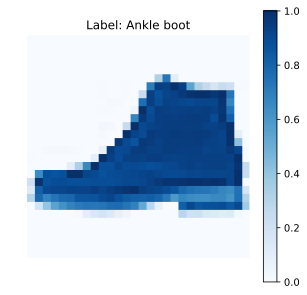

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5, 5])
plt.imshow(X_train[42].reshape(28, 28), cmap='Blues')
plt.title(f"Label: {names[y_train[42][0]]}")
plt.axis('off')
plt.colorbar()
plt.show()

In [20]:
seed = 42

np.random.seed(seed)

indices = np.random.choice(len(X_train), size=49, replace=False)

indices

array([12628, 37730, 39991,  8525,  8279, 51012, 14871, 15127,  9366,
       33322, 53390, 21819,  5026, 23428, 45297, 26354, 30195, 47038,
       20731, 34047, 26064, 42469, 29746, 14522, 31572, 54949, 19368,
        3803, 53325, 14300, 51301,  9008, 47521, 25224, 48921, 37978,
       44171, 26303, 19458,  5369, 50291, 25951, 54908, 56362, 32218,
        2885, 36559,  8966, 46574])

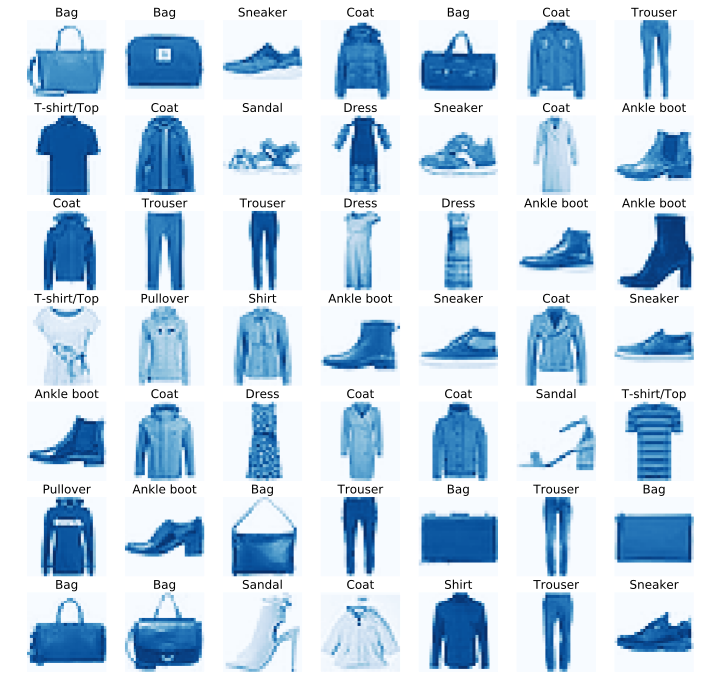

In [21]:
fig, ax_arr = plt.subplots(nrows=7, ncols=7, figsize=[12, 12])

for i, ax in enumerate(ax_arr.reshape(-1)):
    ax.imshow(X_train[indices[i]].reshape(28, 28), cmap='Blues')
    ax.set_title(names[y_train[indices[i]][0]], y=0.97)
    ax.set_axis_off()

### Distribution of labels

In [22]:
import pandas as pd

df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])

df['Y Test'] = np.bincount(y_test.reshape(-1))

df['Y Combined'] = df['Y Train'] + df['Y Test']

df.index.set_names('Labels', inplace=True)

df

,Y Train,Y Test,Y Combined
Labels,,,
0,6000,1000,7000
1,6000,1000,7000
2,6000,1000,7000
3,6000,1000,7000
4,6000,1000,7000
5,6000,1000,7000
6,6000,1000,7000
7,6000,1000,7000
8,6000,1000,7000


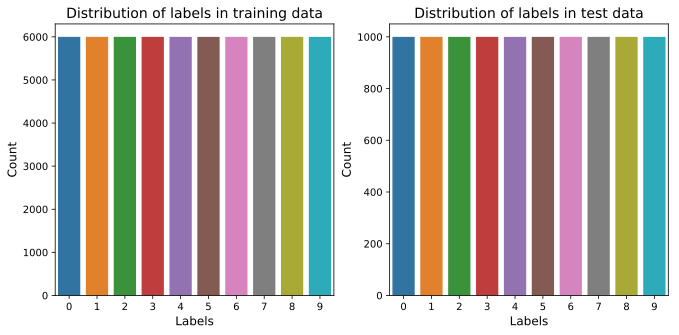

In [23]:
import seaborn as sns

plt.figure(figsize=(11, 5))

plt.subplot(121)
sns.barplot(data=df[['Y Train']].T)
plt.title("Distribution of labels in training data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(122)
sns.barplot(data=df[['Y Test']].T)
plt.title("Distribution of labels in test data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

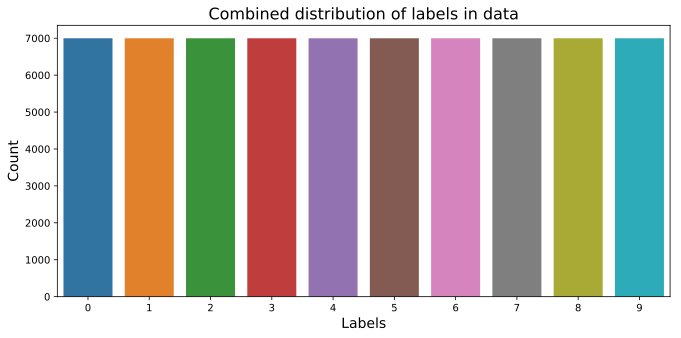

In [24]:
plt.figure(figsize=[11, 5])
sns.barplot(x=classes, y=np.bincount(np.concatenate([y_train.reshape(-1), y_test.reshape(-1)])));
plt.title("Combined distribution of labels in data", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

### Equations on: 01 -- Digits MNIST - NumPy

## Gradient descent

In [25]:
hidden_layer_size = 64

import NNfromScratch as nnfs

# Hidden layers
Θ1 = nnfs.random_initializer([hidden_layer_size, (X_train.shape[1] + 1)], seed=seed)
Θ2 = nnfs.random_initializer([num_classes, (hidden_layer_size + 1)], seed=seed)

Θ1.shape, Θ2.shape

((64, 785), (10, 65))

In [26]:
from tqdm import tqdm

# Learning rate
α = 0.1

# Cost regularization
λ = 1

iterations = [0]

J_train = [nnfs.cost(X_train, y_train, Θ1, Θ2, λ)]
J_test  = [nnfs.cost(X_test, y_test, Θ1, Θ2, λ)]

In [27]:
%%time

for i in tqdm(range(100_001)):
    indices = np.random.choice(len(X_train), size=1_000, replace=False)

    # Regularized gradient
    D1, D2 = nnfs.gradient(X_train[indices], y_train[indices], Θ1, Θ2, λ, c=num_classes)

    # Backpropagation
    Θ1 -= α*D1
    Θ2 -= α*D2

    # Cost
    if ((i < 100) or (i%1_000 == 0)):
        iterations.append(i)
        J_train.append(nnfs.cost(X_train, y_train, Θ1, Θ2, λ))
        J_test.append(nnfs.cost(X_test, y_test, Θ1, Θ2, λ))

print(f"\nCost started at: {J_train[0]:,.2f}",
      f"and after {iterations[-1]:,d} iterations it ended at:",
      f"{J_train[-1]:,.2f}.\n")

100%|██████████| 100001/100001 [34:24<00:00, 36.96it/s] 


Cost started at: 7.85 and after 100,000 iterations it ended at: 0.70.

CPU times: user 49min 16s, sys: 54.4 s, total: 50min 10s
Wall time: 34min 24s


## Cost

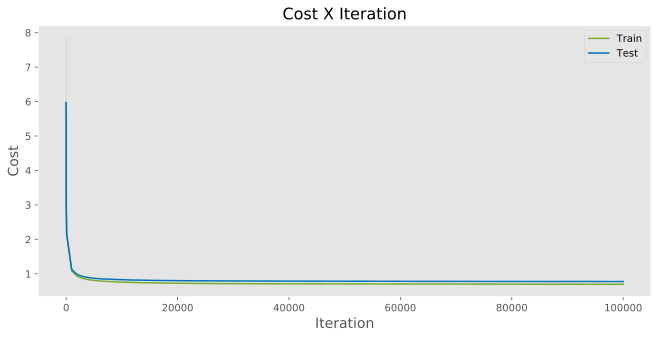

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=[11, 5])
sns.lineplot(x=np.asarray(iterations), y=np.asarray(J_train), color=[0.4660, 0.6740, 0.1880])
sns.lineplot(x=np.asarray(iterations), y=np.asarray(J_test), color=[0.0000, 0.4470, 0.7410])
plt.title("Cost X Iteration", fontsize=16)
plt.legend(['Train', 'Test'])
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid()
plt.show()

## Scores

### Training set

In [29]:
p_train = nnfs.predict(X_train, y_train, Θ1, Θ2)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 87.38%


In [30]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 52,430 out of 60,000 images.


In [31]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 7,570 out of 60,000 images.


### Test set

In [32]:
p_test = nnfs.predict(X_test, y_test, Θ1, Θ2)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 85.59%


In [33]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 8,559 out of 10,000 images.


In [34]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 1,441 out of 10,000 images.


## Distribution of labels

In [35]:
df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])
df['Pred Train'] = np.bincount(p_train.reshape(-1))
df['Train Diff'] = df['Pred Train'] - df['Y Train']
df['Y Test'] = np.bincount(y_test.reshape(-1))
df['Pred Test'] = np.bincount(p_test.reshape(-1))
df['Test Diff'] = df['Pred Test'] - df['Y Test']
df['Y Combined'] = df['Y Train'] + df['Y Test']
df['Pred Combined'] = df['Pred Train'] + df['Pred Test']
df['Combined Diff'] = df['Pred Combined'] - df['Y Combined']
df.index.set_names('Labels', inplace=True)
df

,Y Train,Pred Train,Train Diff,Y Test,Pred Test,Test Diff,Y Combined,Pred Combined,Combined Diff
Labels,,,,,,,,,
0,6000,6236,236,1000,1021,21,7000,7257,257
1,6000,5885,-115,1000,970,-30,7000,6855,-145
2,6000,6210,210,1000,1060,60,7000,7270,270
3,6000,6350,350,1000,1066,66,7000,7416,416
4,6000,6137,137,1000,997,-3,7000,7134,134
5,6000,5922,-78,1000,978,-22,7000,6900,-100
6,6000,5107,-893,1000,852,-148,7000,5959,-1041
7,6000,6073,73,1000,1029,29,7000,7102,102
8,6000,6038,38,1000,1016,16,7000,7054,54


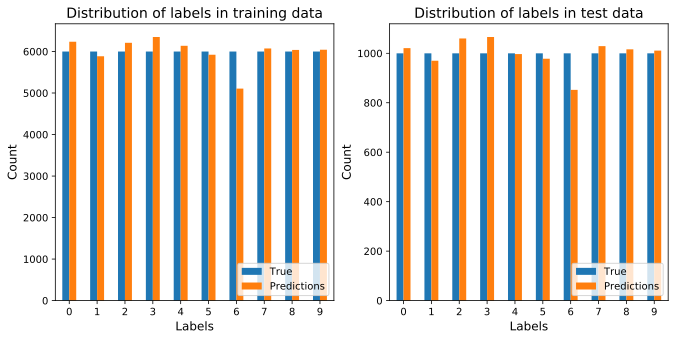

In [36]:
plt.style.use('default')

fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

df[['Y Train', 'Pred Train']].plot.bar(ax=axes[0], rot=0)
axes[0].set_title("Distribution of labels in training data", fontsize=14)
axes[0].set_xlabel("Labels", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(['True', 'Predictions'], loc='lower right')

df[['Y Test', 'Pred Test']].plot.bar(ax=axes[1], rot=0)
axes[1].set_title("Distribution of labels in test data", fontsize=14)
axes[1].set_xlabel("Labels", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(['True', 'Predictions'], loc='lower right')

plt.show()

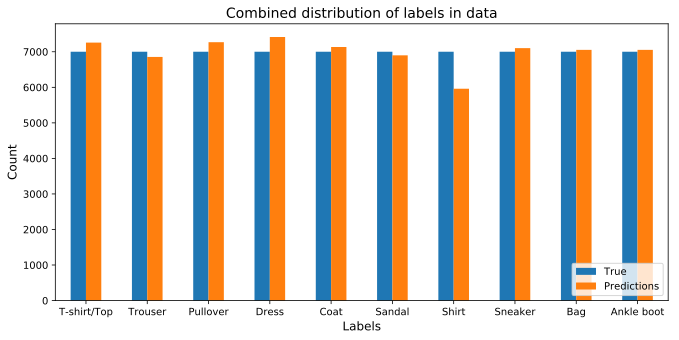

In [37]:
df[['Y Combined', 'Pred Combined']].plot.bar(figsize=(11, 5), rot=0)
plt.title("Combined distribution of labels in data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(np.arange(10), names.values())
plt.legend(['True', 'Predictions'], loc='lower right')
plt.show()

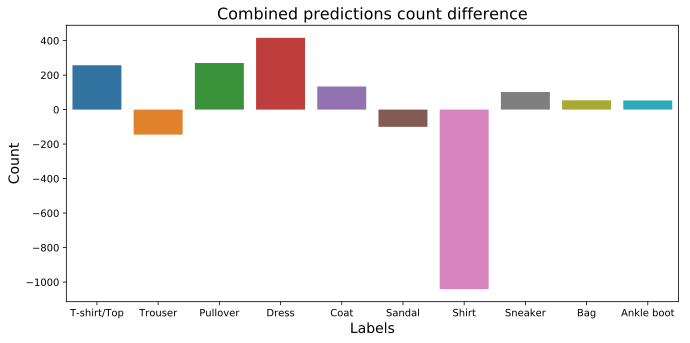

In [38]:
plt.figure(figsize=[11, 5])
sns.barplot(data=df[['Combined Diff']].T)
plt.title("Combined predictions count difference", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(np.arange(10), names.values())
plt.show()

## Correctly classified images

In [39]:
def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {names[y[indices[i]][0]]} | Pred: {names[p[indices[i]][0]]}", fontsize=10)
        ax.set_axis_off()

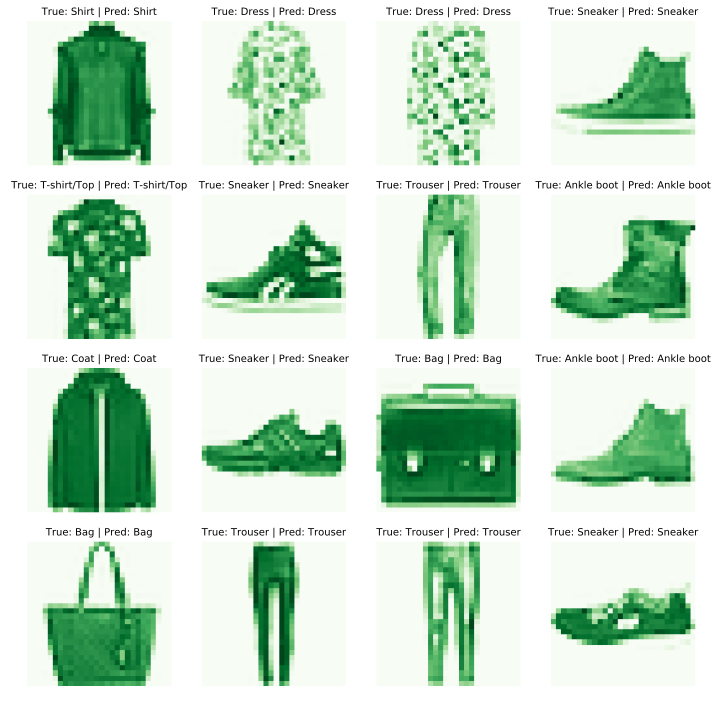

In [40]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

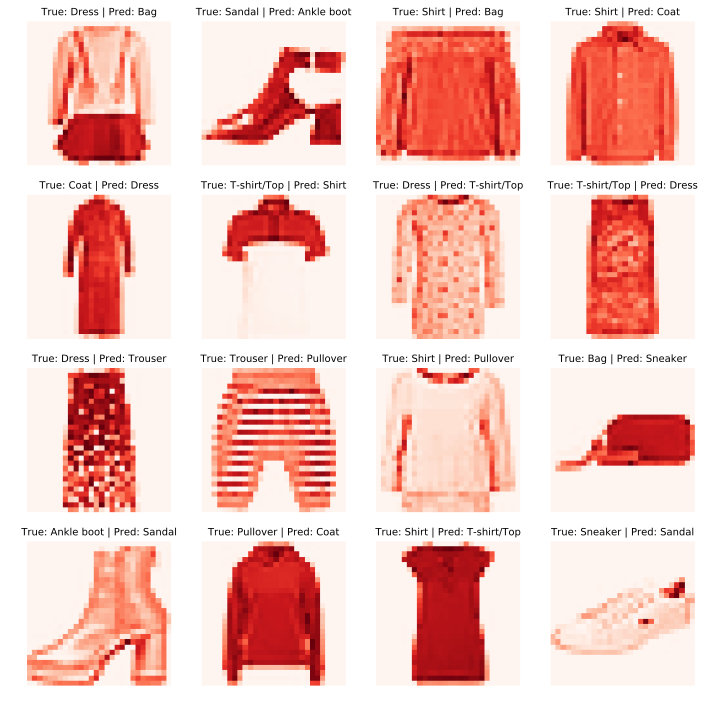

In [41]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')

## Hidden layers weights visualization

### First hidden layer

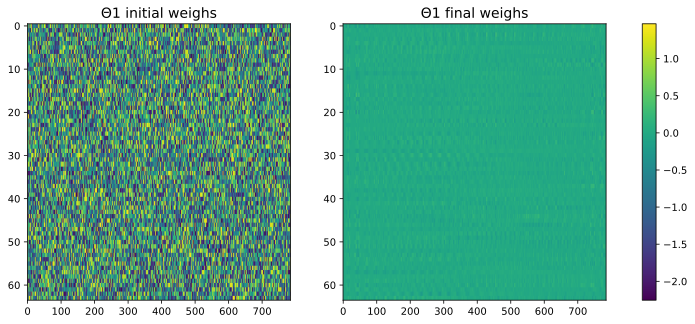

In [42]:
def plot_weights(weights, name):
    fig, ax_arr = plt.subplots(1,2, figsize=[13, 5])
    for ax, w, state, i in zip(ax_arr, weights, ['initial', 'final'], [1, 2]):
        last = ax.imshow(w, cmap='viridis', aspect='auto')
        ax.set_title(f"{name} {state} weighs", fontsize=14)
        ax.grid(False)
    fig.colorbar(last, ax=list(ax_arr))
    plt.show()


Θ1_start = nnfs.random_initializer([hidden_layer_size, (X_train.shape[1] + 1)], seed=seed)
plot_weights([Θ1_start, Θ1], 'Θ1')

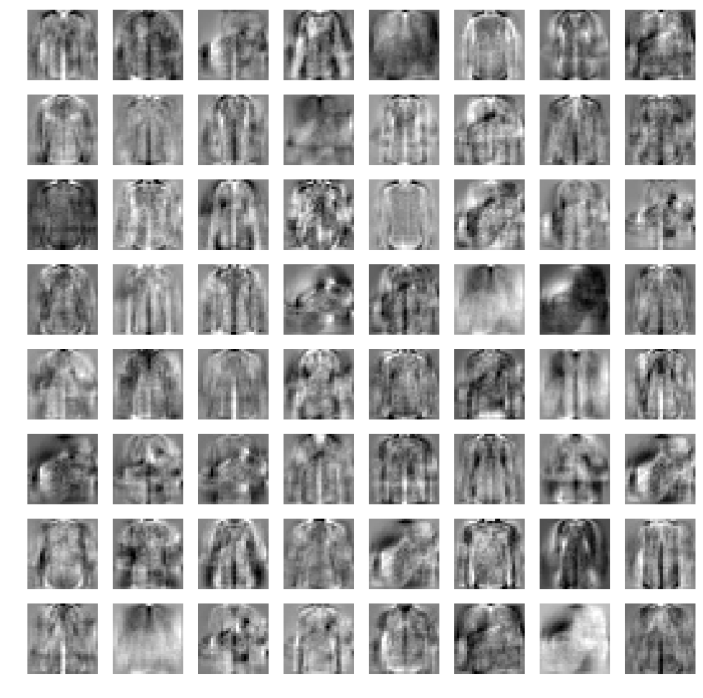

In [43]:
def plot_groups(Θ, group_size, num_groups):
    Θv = [Θ[:, 1:][i].reshape(group_size, group_size) for i in range(num_groups)]
    num_rc = int(np.sqrt(num_groups))
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(Θv[i], cmap='gray')
        ax.set_axis_off()


plot_groups(Θ1, group_size=28, num_groups=hidden_layer_size)

### Second hidden layer

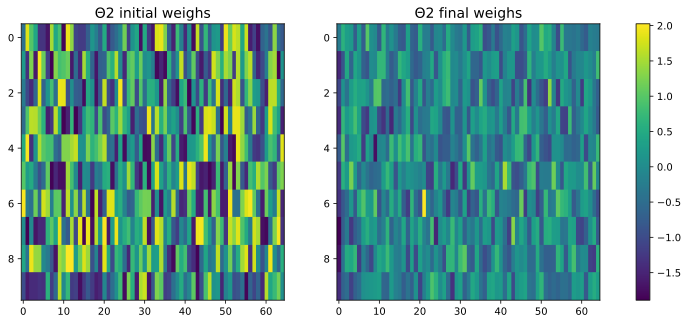

In [44]:
Θ2_start = nnfs.random_initializer([num_classes, (hidden_layer_size + 1)], seed=seed)
plot_weights([Θ2_start, Θ2], 'Θ2')

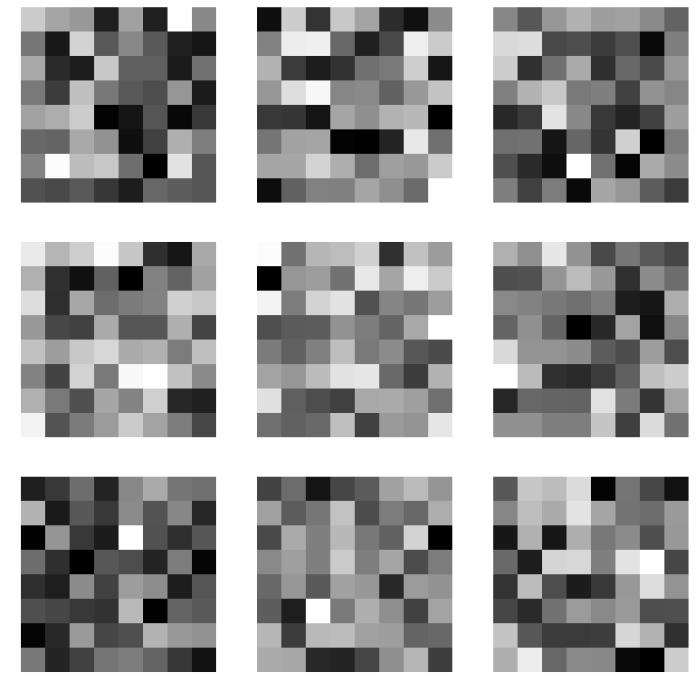

In [45]:
plot_groups(Θ2, group_size=int(np.sqrt(hidden_layer_size)), num_groups=9)